In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from ata

import math
import meep as mp
from meep import mpb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
num_bands = 8
k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(0.5),       # X
            mp.Vector3(0.5, 0.5),  # M
            mp.Vector3()]          # Gamma
k_points = mp.interpolate(4, k_points)

In [7]:
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))] # height is infinite
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))
resolution = 32

In [8]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)


In [12]:
print("Square lattice of rods: TE bands")
# ms.run_te()
# ms.run_tm(mpb.output_efield_z)
ms.run_te(mpb.output_at_kpoint(mp.Vector3(0.5), mpb.output_hfield_z, mpb.output_dpwr))

Square lattice of rods: TE bands
Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
  Vector3<0.5, 0.1, 0.0>
  Vector3<0.5, 0.2, 0.0>
  Vector3<0.5, 0.30000000000000004, 0.0>
  Vector3<0.5, 0.4, 0.0>
  Vector3<0.5, 0.5, 0.0>
  Vector3<0.4, 0.4, 0.0>
  Vector3<0.3, 0.3, 0.0>
  Vector3<0.19999999999999996, 0.19999999999999996, 0.0>
  Vector3<0.09999999999999998, 0.09999999999999998, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.004567146301269531
elapsed time for k point: 0.08141064643859863
elapsed time for k point: 0.03674197196960449
elapsed time for k point: 0.186629056930542
elapsed time for k point: 0.02686905860900879
elapsed time for k point: 0.03232884407043457
elapsed time for k point: 0.04291081428527832
Outputting fields to h.k06.b01.z.te.h5...
Outputting dpwr.k06.

In [21]:
md = mpb.MPBData(rectify=True, periods=5, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

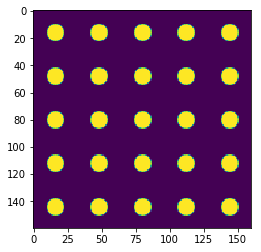

In [22]:
plt.imshow(converted_eps)
